In [16]:
import pandas as pd
import matplotlib.pyplot as plt
#3.10.7

Here I loaded in two seperate data file's having to accout for some latin characters

In [17]:
Rolling_stone = pd.read_csv("albumlist.csv", encoding='latin-1',)
Rate_My_Music= pd.read_csv("rym_top_5000_all_time.csv", encoding='latin-1',)
Rate_My_Music.head()


,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


Here I loaded I joined my two data sets and cleaned some data by renaming some columns in Rate_My_Music to match some columns in Rolling_stone for and easier merge

In [18]:
Rate_My_Music = Rate_My_Music.rename(columns={"Artist Name": "Artist", "Genres": "Genre"})
joined_data = pd.merge(Rolling_stone, Rate_My_Music, on=['Album', 'Artist'], how='inner')
joined_data = joined_data.drop('Genre_y', axis=1)
joined_data = joined_data.rename(columns={'Genre_x': 'Genre'})
joined_data.head(8)


,Number,Year,Album,Artist,Genre,Subgenre,Ranking,Release Date,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock",24.0,1 June 1967,"psychedelic, playful, melodic, male vocals, wa...",4.13,"43,576",863
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock",20.0,16 May 1966,"Wall of Sound, warm, bittersweet, love, romant...",4.18,"36,305",727
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock",11.0,5 August 1966,"psychedelic, melodic, male vocals, drugs, ecle...",4.23,"43,178",1160
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock",35.0,30 August 1965,"poetic, cryptic, surreal, sarcastic, male voca...",4.17,"26,338",604
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock,73.0,3 December 1965,"melodic, love, male vocals, bittersweet, roman...",4.03,"33,508",721
5,6,1971,What's Going On,Marvin Gaye,Funk / Soul,Soul,74.0,21 May 1971,"political, passionate, conscious, mellow, male...",4.11,"18,776",341
6,7,1972,Exile on Main St.,The Rolling Stones,Rock,"Blues Rock, Rock & Roll, Classic Rock",176.0,26 May 1972,"sexual, playful, male vocals, rebellious, ener...",3.98,"14,694",321
7,8,1979,London Calling,The Clash,Rock,"Punk, New Wave",90.0,14 December 1979,"political, energetic, rebellious, eclectic, ma...",4.01,"28,704",747


In [19]:
joined_data.count

<bound method DataFrame.count of      Number  Year                                  Album             Artist  \
0         1  1967  Sgt. Pepper's Lonely Hearts Club Band        The Beatles   
1         2  1966                             Pet Sounds     The Beach Boys   
2         3  1966                               Revolver        The Beatles   
3         4  1965                   Highway 61 Revisited          Bob Dylan   
4         5  1965                            Rubber Soul        The Beatles   
..      ...   ...                                    ...                ...   
289     491  1967                  Born Under a Bad Sign        Albert King   
290     493  2002                   Yankee Hotel Foxtrot              Wilco   
291     497  2001                      White Blood Cells  The White Stripes   
292     498  1989                        The Stone Roses    The Stone Roses   
293     500  1998                               Aquemini            OutKast   

                  

This where I viuslized my Data I started by showing a Bar Graph of Top 10 Genres

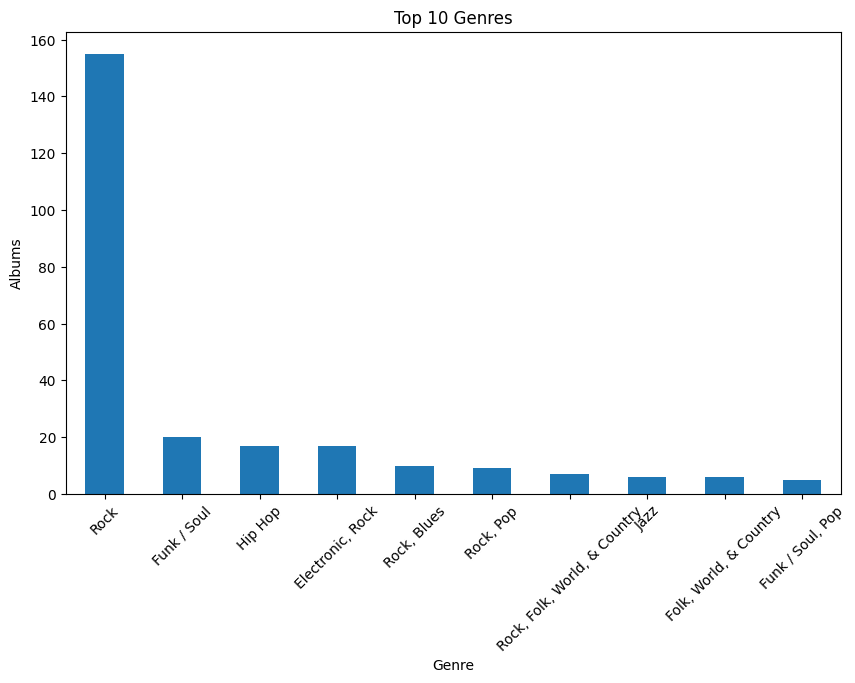

In [20]:
top_10_genres = joined_data['Genre'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Albums')
plt.xticks(rotation=45)
plt.show()

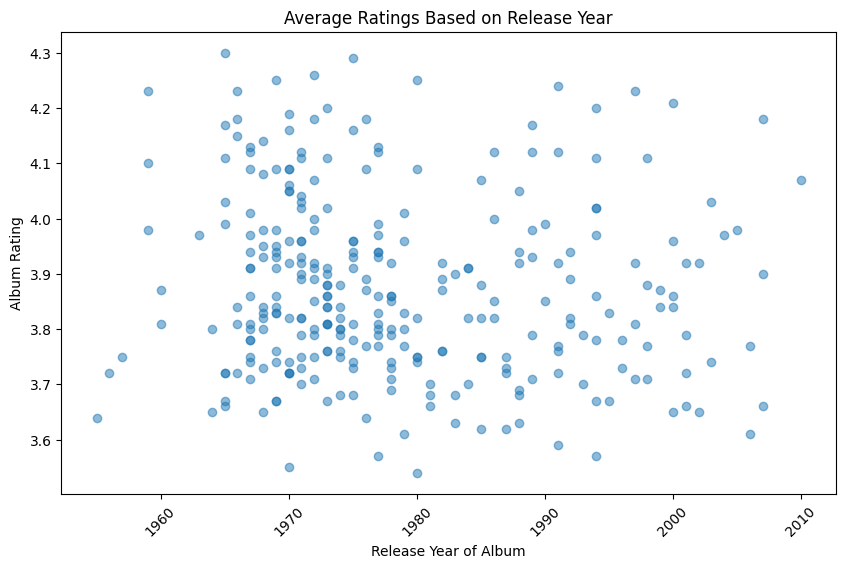

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(joined_data['Year'], joined_data['Average Rating'], alpha=0.5)
plt.title('Average Ratings Based on Release Year')
plt.xlabel('Release Year of Album')
plt.ylabel('Album Rating')
plt.xticks(rotation=45)
plt.show()

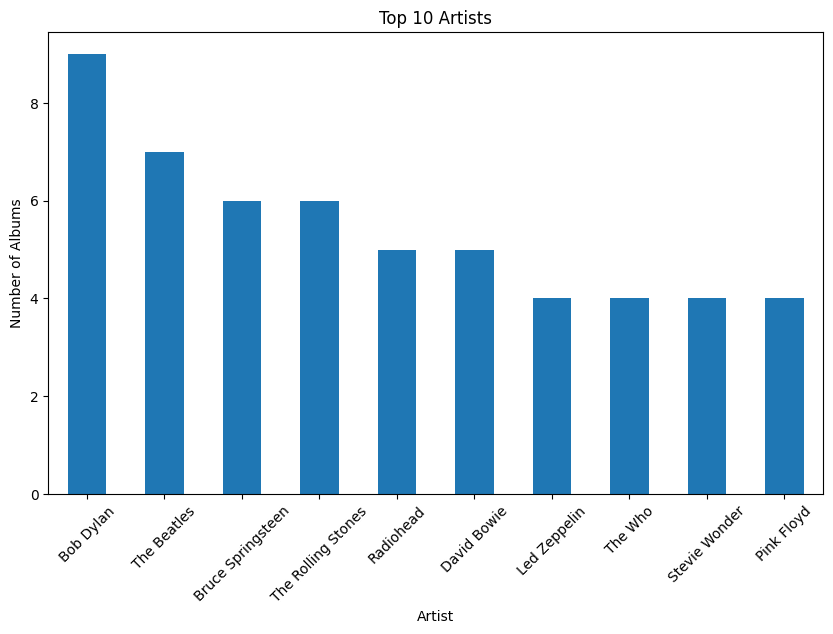

In [22]:

top_10_artists = joined_data['Artist'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar')
plt.title('Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Albums')
plt.xticks(rotation=45)
plt.show()